In [94]:
# 한글 깨짐 방지 ( Colab )
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

!pip install pycountry # 이건 pip
# 완료 후 런타임 재 시작

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# WHO Suicide Statistics
df = pd.read_csv(r'https://raw.githubusercontent.com/the9world/My_Study/main/data/Z_running_file/who_suicide_statistics.csv')
# 자살 건수(suicides_no, Number of suicides)
# 전체 생존인구(population, Number of all living people )
plt.rc('font', family='NanumBarunGothic')  # 한글 깨짐 방지용


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  41520 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [97]:
df_russia= df[df['country'].str.contains('Russia')]

In [98]:
# include="all" : 수치형 및 범주형 열 모두에 대한 통계 정보가 포함,  T : 행과 열을 전환하여 열을 행으로 변환
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,43776,141,Hungary,456,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,43776.0,NaN,NaN,NaN,1998.502467,10.338711,1979.0,1990.0,1999.0,2007.0,2016.0
sex,43776,2,female,21888,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,43776,6,15-24 years,7296,NaN,NaN,NaN,NaN,NaN,NaN,NaN
suicides_no,41520.0,NaN,NaN,NaN,193.31539,800.589926,0.0,1.0,14.0,91.0,22338.0
population,38316.0,NaN,NaN,NaN,1664091.135374,3647231.227487,259.0,85112.75,380655.0,1305698.0,43805214.0


In [99]:
df.isna()

,country,year,sex,age,suicides_no,population
0,False,False,False,False,True,False
1,False,False,False,False,True,False
2,False,False,False,False,True,False
3,False,False,False,False,True,False
4,False,False,False,False,True,False
...,...,...,...,...,...,...
43771,False,False,False,False,False,True
43772,False,False,False,False,False,True
43773,False,False,False,False,False,True
43774,False,False,False,False,False,True


In [100]:
df.isna().sum()

country           0
year              0
sex               0
age               0
suicides_no    2256
population     5460
dtype: int64

In [101]:
# 우선 suicides_no 열의 결측치 제거
# 총 생존 인구는 나중에 열을 제거 할거라 냅둠
df.dropna(subset=['suicides_no'], inplace=True) ; df

,country,year,sex,age,suicides_no,population
24,Albania,1987,female,15-24 years,14.0,289700.0
25,Albania,1987,female,25-34 years,4.0,257200.0
26,Albania,1987,female,35-54 years,6.0,278800.0
27,Albania,1987,female,5-14 years,0.0,311000.0
28,Albania,1987,female,55-74 years,0.0,144600.0
...,...,...,...,...,...,...
43771,Zimbabwe,1990,male,25-34 years,150.0,NaN
43772,Zimbabwe,1990,male,35-54 years,132.0,NaN
43773,Zimbabwe,1990,male,5-14 years,6.0,NaN
43774,Zimbabwe,1990,male,55-74 years,74.0,NaN


In [102]:
# 인덱스 재정의, 기존 인덱스를 제거하고 새로 인덱스를 부여
df.reset_index(drop=True, inplace=True) ; df

,country,year,sex,age,suicides_no,population
0,Albania,1987,female,15-24 years,14.0,289700.0
1,Albania,1987,female,25-34 years,4.0,257200.0
2,Albania,1987,female,35-54 years,6.0,278800.0
3,Albania,1987,female,5-14 years,0.0,311000.0
4,Albania,1987,female,55-74 years,0.0,144600.0
...,...,...,...,...,...,...
41515,Zimbabwe,1990,male,25-34 years,150.0,NaN
41516,Zimbabwe,1990,male,35-54 years,132.0,NaN
41517,Zimbabwe,1990,male,5-14 years,6.0,NaN
41518,Zimbabwe,1990,male,55-74 years,74.0,NaN


In [103]:
# age 컬럼 밸류에서 years을 삭제 및 5-14를 05-14로 변경
df['age'] = df['age'].str.replace(' years', '')
df['age'] = df['age'].replace('5-14', '05-14'); df

,country,year,sex,age,suicides_no,population
0,Albania,1987,female,15-24,14.0,289700.0
1,Albania,1987,female,25-34,4.0,257200.0
2,Albania,1987,female,35-54,6.0,278800.0
3,Albania,1987,female,05-14,0.0,311000.0
4,Albania,1987,female,55-74,0.0,144600.0
...,...,...,...,...,...,...
41515,Zimbabwe,1990,male,25-34,150.0,NaN
41516,Zimbabwe,1990,male,35-54,132.0,NaN
41517,Zimbabwe,1990,male,05-14,6.0,NaN
41518,Zimbabwe,1990,male,55-74,74.0,NaN


In [104]:
# 자살이 0인 것도 찾아보자. 0은 자살이 0인 것이지 Nan이 아님.
print((df==0).sum())
# print에 0인 값은 suicides_no 열에만 있다고 나옴
df.loc[df['suicides_no']==0]

country           0
year              0
sex               0
age               0
suicides_no    9299
population        0
dtype: int64


,country,year,sex,age,suicides_no,population
3,Albania,1987,female,05-14,0.0,311000.0
4,Albania,1987,female,55-74,0.0,144600.0
9,Albania,1987,male,05-14,0.0,338200.0
15,Albania,1988,female,05-14,0.0,317200.0
21,Albania,1988,male,05-14,0.0,345000.0
...,...,...,...,...,...,...
41501,Virgin Islands (USA),2015,female,75+,0.0,3508.0
41502,Virgin Islands (USA),2015,male,15-24,0.0,6933.0
41505,Virgin Islands (USA),2015,male,05-14,0.0,7291.0
41506,Virgin Islands (USA),2015,male,55-74,0.0,12615.0


In [105]:
# 어떤 나라들이 있는지, 몇 개 국의 데이터가 있는지 확인
print('데이터 내의 나라들:\n\n',df['country'].unique(),"\n")
print('-'*60)
print('\n중복제거 나라의 수:',df['country'].nunique(), "\n")
# df['coutry']에 한국이 뭘로 써있는지 찾아보자,
# unique로 나온 것들 중에 korea or Korea를 직접 찾아도 되지만 코드를 써보자.
print('-'*60)
print("\n",df[df['country'].str.contains('Korea')])

데이터 내의 나라들:

 ['Albania' 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados'
 'Belarus' 'Belgium' 'Belize' 'Bermuda' 'Bolivia' 'Bosnia and Herzegovina'
 'Brazil' 'British Virgin Islands' 'Brunei Darussalam' 'Bulgaria'
 'Cabo Verde' 'Canada' 'Cayman Islands' 'Chile' 'Colombia' 'Costa Rica'
 'Croatia' 'Cuba' 'Cyprus' 'Czech Republic' 'Denmark' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia'
 'Falkland Islands (Malvinas)' 'Fiji' 'Finland' 'France' 'French Guiana'
 'Georgia' 'Germany' 'Greece' 'Grenada' 'Guadeloupe' 'Guatemala' 'Guyana'
 'Haiti' 'Honduras' 'Hong Kong SAR' 'Hungary' 'Iceland'
 'Iran (Islamic Rep of)' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica'
 'Japan' 'Jordan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Macau' 'Malaysia' 'Maldives' 'Malta'
 'Martinique' 'Mauritius' 'Mayotte' 'Mexico' 'Monaco' 'Mongolia'
 'Montenegro' 'Montserrat' 'M

In [106]:
print('-'*28,'2016년 제외', '-'*28)
print(df.loc[(df['year']!=2016)].describe())
print('-'*30,'2016년만', '-'*30)
print(df.loc[(df['year']==2016)].describe())

---------------------------- 2016년 제외 ----------------------------
               year   suicides_no    population
count  41256.000000  41256.000000  3.584400e+04
mean    1998.886853    194.152899  1.705956e+06
std       10.010166    802.998139  3.706646e+06
min     1979.000000      0.000000  2.590000e+02
25%     1991.000000      1.000000  8.056600e+04
50%     2000.000000     14.000000  3.763000e+05
75%     2007.000000     91.000000  1.349025e+06
max     2015.000000  22338.000000  4.380521e+07
------------------------------ 2016년만 ------------------------------
         year  suicides_no    population
count   264.0   264.000000  2.160000e+02
mean   2016.0    62.435606  7.109486e+05
std       0.0   142.497481  1.357811e+06
min    2016.0     0.000000  5.600000e+02
25%    2016.0     0.000000  8.104250e+04
50%    2016.0     6.000000  2.740515e+05
75%    2016.0    65.250000  6.715552e+05
max    2016.0  1421.000000  1.062968e+07


In [107]:
# 전체 국가 연도별(2016년 제외) 데이터가 평균 1998개 이지만,
# 2016년도 총 데이터 갯수는 216개 밖에 안된다.
# 2016년도 데이터 다른 년도 데이터보다 1/10 밖에 안되기 때문에, 2016 데이터는 제외
df= df.loc[(df['year'])<2016] ; df

,country,year,sex,age,suicides_no,population
0,Albania,1987,female,15-24,14.0,289700.0
1,Albania,1987,female,25-34,4.0,257200.0
2,Albania,1987,female,35-54,6.0,278800.0
3,Albania,1987,female,05-14,0.0,311000.0
4,Albania,1987,female,55-74,0.0,144600.0
...,...,...,...,...,...,...
41515,Zimbabwe,1990,male,25-34,150.0,NaN
41516,Zimbabwe,1990,male,35-54,132.0,NaN
41517,Zimbabwe,1990,male,05-14,6.0,NaN
41518,Zimbabwe,1990,male,55-74,74.0,NaN


In [108]:
# 위에서 찾은 그냥 우리나라 데이터가 얼마나 있나 보자.
df.loc[df['country']=='Republic of Korea']

,country,year,sex,age,suicides_no,population
29844,Republic of Korea,1985,female,15-24,296.0,4148300.0
29845,Republic of Korea,1985,female,25-34,228.0,3568800.0
29846,Republic of Korea,1985,female,35-54,262.0,4267400.0
29847,Republic of Korea,1985,female,05-14,13.0,4056400.0
29848,Republic of Korea,1985,female,55-74,161.0,2000500.0
...,...,...,...,...,...,...
30211,Republic of Korea,2015,male,25-34,988.0,3573299.0
30212,Republic of Korea,2015,male,35-54,3678.0,8593620.0
30213,Republic of Korea,2015,male,05-14,17.0,2523952.0
30214,Republic of Korea,2015,male,55-74,3123.0,5071921.0


In [109]:
# 한국은 1985년도부터 데이터가 있기 때문에 다른 나라와 비교할 때를 위해 데이터를 1985년 이후로 한다.
df=df.loc[df['year']>=1985]
# 개인적으로 총 인구는 필요 없어 보이기 때문에 제외
df=df.iloc[:,:5];df

,country,year,sex,age,suicides_no
0,Albania,1987,female,15-24,14.0
1,Albania,1987,female,25-34,4.0
2,Albania,1987,female,35-54,6.0
3,Albania,1987,female,05-14,0.0
4,Albania,1987,female,55-74,0.0
...,...,...,...,...,...
41515,Zimbabwe,1990,male,25-34,150.0
41516,Zimbabwe,1990,male,35-54,132.0
41517,Zimbabwe,1990,male,05-14,6.0
41518,Zimbabwe,1990,male,55-74,74.0


In [110]:
# 비교할 때 사용하기 위해 한국 데이터만 따로 변수에 저장
df_kor = df.groupby('country').get_group('Republic of Korea')
df_kor.reset_index(drop=True, inplace=True)

Text(0, 0.5, 'Suicides')

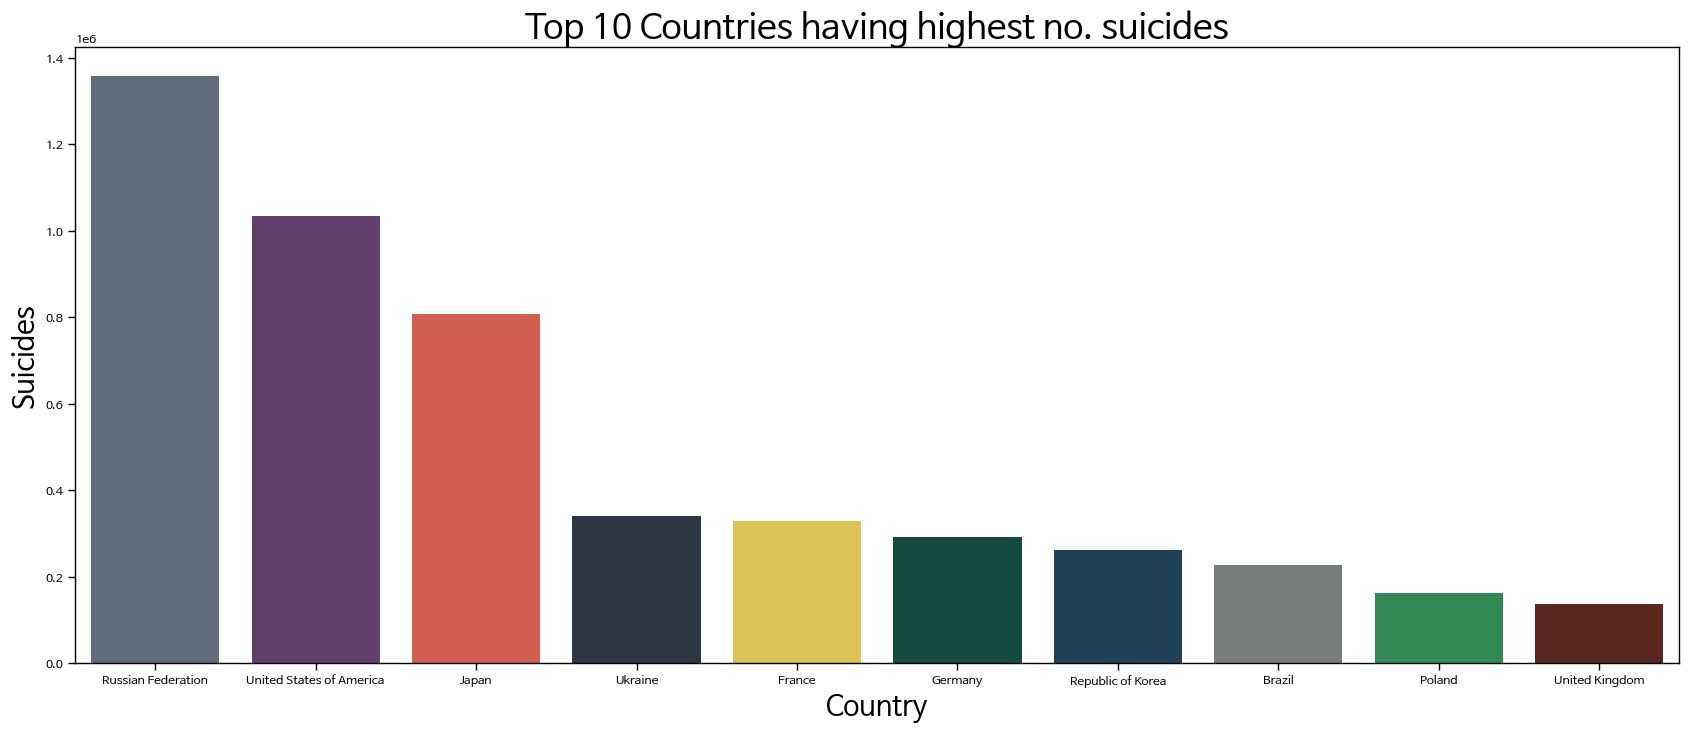

In [111]:
# 자살 건수가 많은 나라 Top10
df_sui_n=pd.DataFrame(df.groupby(['country'])['suicides_no'].sum().reset_index())
df_sui_n.sort_values(by=['suicides_no'],ascending=False,inplace=True)

fig, ax = plt.subplots()
type_colors = ['#5D6D7E',  # Grass
                    '#633974',  # Fire
                    '#E74C3C',  # Water
                    '#283747',  # Bug
                    '#F4D03F',  # Normal
                    '#0B5345',  # Poison
                    '#154360',  # Electric
                    '#7B7D7D',  # Ground
                    '#229954',  # Fairy
                    '#641E16',  # Fighting
                   ]
fig.set_size_inches(20.7, 8,16)

sns.set_context("paper", font_scale=1)
f=sns.barplot(x=df_sui_n["country"].head(10),
              y=df_sui_n['suicides_no'].head(10),
              palette= type_colors)
f.set_title('Top 10 Countries having highest no. suicides', fontsize=25)
f.set_xlabel("Country",fontsize=20)
f.set_ylabel("Suicides",fontsize=20)

# 나라별 총 사망자만 보기
# df_sui_n=pd.DataFrame(df.groupby(['country'])['suicides_no'].sum().reset_index())
# df_sui_n.sort_values(by=['suicides_no'],ascending=False,inplace=True)
# df_sui_n

In [112]:
# 나이 자살 비교

import plotly.graph_objects as go
fig = go.Figure(data=[
    go.Pie(labels=df['age'], values=df['suicides_no'], textinfo='label+percent',
           name='world_age', domain={'x': [0, 0.45]}),
    go.Pie(labels=df_kor['age'], values=df_kor['suicides_no'], textinfo='label+percent',
           name='kor_age', domain={'x': [0.55, 1]})
])

fig.update_layout(
    annotations= [dict(text="""suicides_age<br><br>
World                                                     Korea""",
             x=0.5, y=0.95, font_size=20, showarrow=False)] )

fig.show()

# # 35세에서 54세가 가장 자살자가 많다? 구간이 커서?


# 1. import plotly.graph_objects as go 를 사용하여 Pie Charts 1개 그리기

# go.Figure(data=[go.Pie(labels=df_kor['age'], values=df_kor['suicides_no'],
#                        textinfo='label+percent',
#                        insidetextorientation='radial')])
# ==============================================================================

# 2. matplotlib 의 pie plot 그리기
# 글꼴 크기 설정
# plt.rcParams['font.size'] = 10

# # df_age 데이터 생성 (예시)
# df_age = df.groupby('age')['suicides_no'].sum()

# # 파이 차트 그리기
# plt.pie(df_age, labels=df_age.index, autopct='%.1f%%')
# plt.show()
# ==============================================================================

In [113]:
# 남녀 자살 비교, 세계 : 한국

fig = go.Figure(data=[
    go.Pie(labels=df['sex'], values=df['suicides_no'], textinfo='label+percent',
           name='world_sex', domain={'x': [0, 0.45]}),
    go.Pie(labels=df_kor['sex'], values=df_kor['suicides_no'], textinfo='label+percent',
           name='kor_sex', domain={'x': [0.55, 1]})
])

fig.update_layout(
    annotations= [dict(text="""suicides_sex<br><br>
World                                                     Korea""",
             x=0.5, y=0.95, font_size=20, showarrow=False)] )
fig.show()

# 남녀 사망자만 보기  : line.5) 한국만 보기
# df_gen=pd.DataFrame(df.groupby(['country','sex'])['suicides_no'].sum()).reset_index()
# df_gen=pd.merge(df_gen,pd.DataFrame(df_gen.groupby(['country'])['suicides_no'].sum()).reset_index(),on=['country'])
# df_gen.rename(columns={'suicides_no_x':'gender_suicides','suicides_no_y':'total_suicides'},inplace=True)
# df_gen.sort_values(by=['total_suicides'],ascending=False,inplace=True)
# df_gen.loc[(df_gen['country']=='Republic of Korea')]

<Axes: xlabel='year', ylabel='suicides_no'>

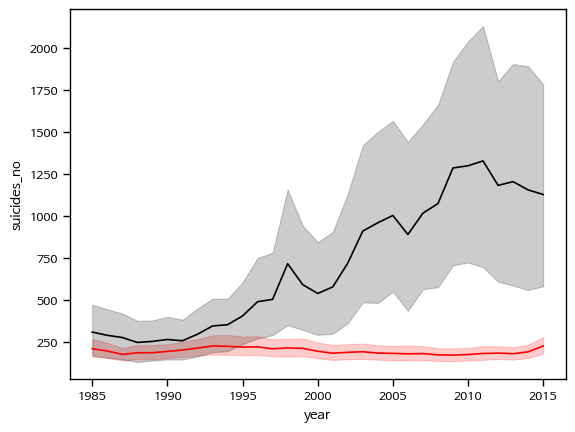

In [114]:
# 세계 데이터 평균과 한국 데이터 연도별 자살 비교
sns.lineplot(data=df[df['year'] >= 1985], x='year', y=('suicides_no'), color='r')
sns.lineplot(data=df_kor[df_kor['year'] >= 1985], x='year', y='suicides_no', color='black')
# sns.lineplot(data=df[ (df['year'] >= 1985) & (df['country'] == 'Japan') ], x='year', y='suicides_no', color='green')


# 방법2) 데이터 평균 
# world_mean = df.groupby('year')['suicides_no'].mean().reset_index()
# 그래프 그리기
# sns.lineplot(data=world_mean, x='year', y='suicides_no', color='r', label='World Mean')
# sns.lineplot(data=df_kor, x='year', y='suicides_no', color='black', label='Korea')
# sns.lineplot(data=df[(df['year'] >= 1985) & (df['country'] == 'Japan')], x='year', y='suicides_no', color='green', label='Japan')

In [116]:
import plotly.express as px

count_max_sui=pd.DataFrame(df.groupby(['year','country'])['suicides_no'].sum().reset_index())

fig4 = px.choropleth(count_max_sui.sort_values("year"), 
                        locations = 'country',
                        color = "suicides_no",
                        color_continuous_scale = 'bluyl',
                        locationmode='country names',
                        animation_frame= 'year')
fig4.update_layout(title='World Suicides')
fig4.show()

# px.choropleth: 이 함수는 Plotly Express에서 제공되며, 코로플레스 지도를 생성하는 데 사용됩니다.
# 데이터, 위치, 색상, color_continuous_scale, locationmode, animation_frame 등과 같은 여러 매개변수를 설정하는 데 사용됩니다.

# df.sort_values("year"): 이는 DataFrame df를 "year" 열을 기준으로 오름차순으로 정렬합니다. 이렇게 함으로써 코로플레스 지도의 애니메이션 프레임이 올바른 순서로 표시됩니다.
# locations: 이 매개변수는 지도에서 위치 이름을 포함하는 DataFrame의 열을 지정합니다. 이 경우 "country"로 설정됩니다.

# color: 이 매개변수는 색상으로 표시될 값을 포함하는 DataFrame의 열을 지정합니다. 이 경우 "suicides_no"로 설정됩니다.

# color_continuous_scale: 이 매개변수는 값들을 매핑할 때 사용할 색상 척도를 지정합니다. 다양한 색상 척도 이름을 받아들이며, 이 경우 'bluyl'로 설정하여 파란색에서 노란색까지의 색상 척도를 사용합니다.

# locationmode: 이 매개변수는 위치가 나타내는 모드를 지정합니다. 이 경우 "country names"로 설정되어 위치가 이름으로 표시됨을 나타냅니다.

# animation_frame: 이 매개변수는 DataFrame에서 애니메이션 프레임을 결정하는 열을 지정합니다. 이 열의 각 고유한 값은 애니메이션의 개별 프레임으로 처리됩니다. 이 경우 "year"로 설정됩니다.

# fig4.update_layout: 이 메서드는 그림의 레이아웃을 업데이트하는 데 사용됩니다. 이 경우 코로플레스 지도의 제목을 'World Suicides'로 설정하는 데 사용됩니다.


# 이 코드는 다양한 국가에 대한 "suicides_no" 데이터를 시간별로 시각화하는 코로플레스 지도를 생성합니다.
# 애니메이션의 각 프레임은 특정 연도를 나타내며, 지도상의 각 국가의 색상은 해당 연도의 "suicides_no" 값에 대응됩니다.
# 이 코드를 실행하기 위해서는 plotly.express 및 pandas와 같은 필요한 라이브러리를 import한 것으로 가정합니다.

In [163]:
from prophet import Prophet
import warnings

# 세계예측2 (1985~2015 데이터)
# 한국이 1985년도부터 데이터가 있어서 한국과 비교를 위해 해당 데이터를 1985부터 사용
dateparse = lambda dates: pd.to_datetime(dates, format='%Y')
data = pd.read_csv('https://raw.githubusercontent.com/the9world/My_Study/main/data/Z_running_file/who_suicide_statistics.csv', parse_dates=['year'], index_col='year',date_parser=dateparse)
data.drop('population', axis=1, inplace=True)
# data.dropna(inplace=True)
data.fillna(data.min(),inplace=True)

data=data.loc[(data.index >= '1985-01-01') & (data.index < '2016-01-01')]

data=data.reset_index()
data=pd.DataFrame(data.groupby(['year'])['suicides_no'].sum()).reset_index()
data=data.sort_values(by=['suicides_no'],ascending=False)
data= data.set_index('year')
data.head()

,suicides_no
year,
2003-01-01,260429.0
2002-01-01,260401.0
1999-01-01,259984.0
2000-01-01,259905.0
2001-01-01,255071.0


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprnqxnkvi/joyiv9lm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprnqxnkvi/88bta1pw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29865', 'data', 'file=/tmp/tmprnqxnkvi/joyiv9lm.json', 'init=/tmp/tmprnqxnkvi/88bta1pw.json', 'output', 'file=/tmp/tmprnqxnkvi/prophet_modely9c18zjp/prophet_model-20230607013751.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:37:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:37:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:

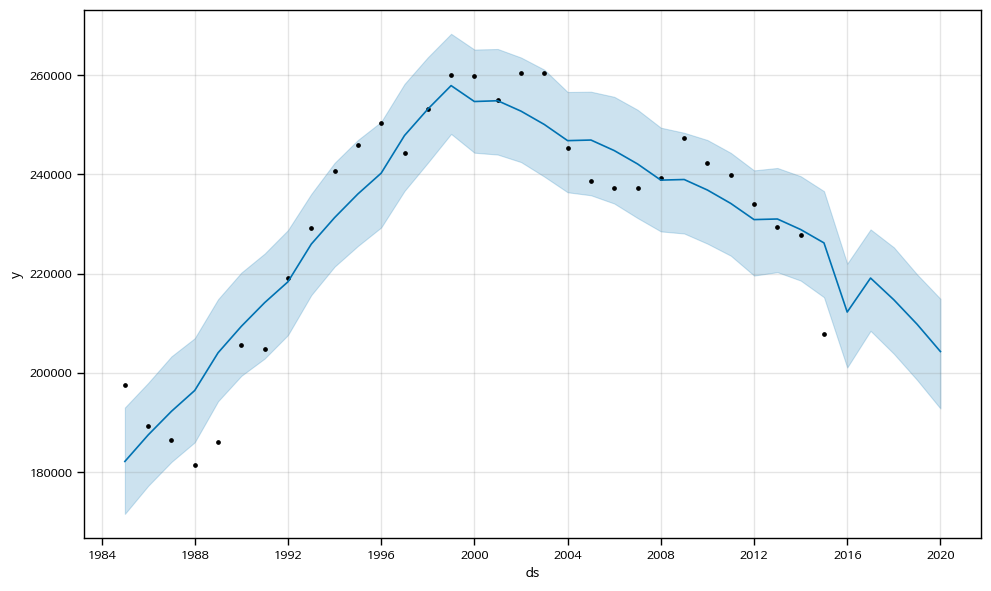

In [164]:
df_prophet = data.copy()
df_prophet.reset_index(drop=False,inplace=True)
df_prophet.columns = ['ds','y']
df_prophet=df_prophet[:]

m = Prophet()
m.fit(df_prophet)
future = m.make_future_dataframe(periods=5,freq='Y')
forecast = m.predict(future)
fig = m.plot(forecast)

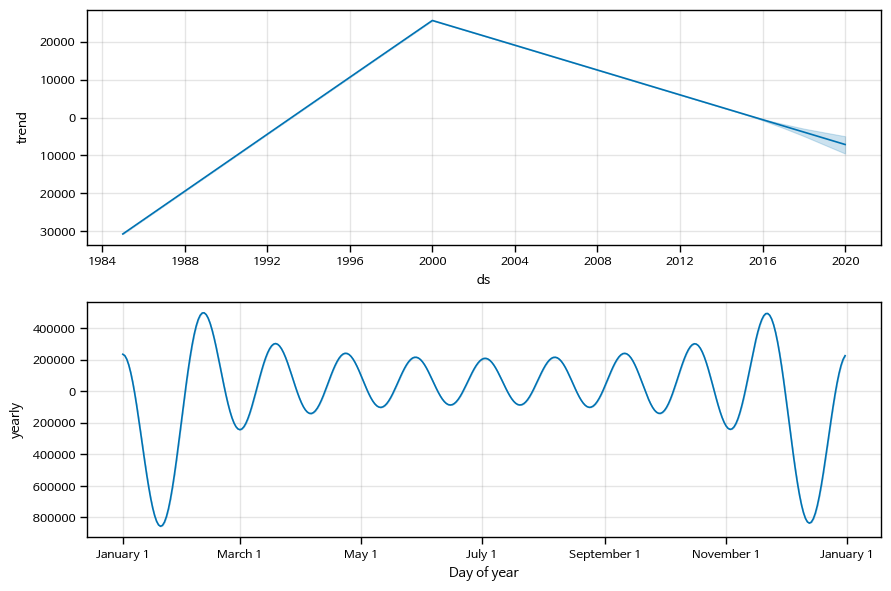

In [159]:
m.plot_components(forecast);

In [156]:
# 한국 미래 예측

dateparse = lambda dates: pd.to_datetime(dates, format='%Y')
data=pd.read_csv('https://raw.githubusercontent.com/the9world/My_Study/main/data/Z_running_file/who_suicide_statistics.csv', parse_dates=['year'], index_col='year',date_parser=dateparse)
data.fillna(data.mean(),inplace=True)
data=data.reset_index()
data=pd.DataFrame(data.groupby(['country','year'])['suicides_no'].sum()).reset_index()
data=data.sort_values(by=['suicides_no'],ascending=False)
data.head()

,country,year,suicides_no
2760,Russian Federation,1994-01-01,61420.0
2761,Russian Federation,1995-01-01,60548.0
2762,Russian Federation,1996-01-01,57511.0
2765,Russian Federation,1999-01-01,56974.0
2767,Russian Federation,2001-01-01,56958.0


In [121]:
data=data.loc[data['country']=='Republic of Korea']
data.drop('country',axis=1,inplace=True)
data = data.set_index('year')
data.head()

,suicides_no
year,
2011-01-01,15906.0
2010-01-01,15558.0
2009-01-01,15402.0
2013-01-01,14426.0
2012-01-01,14159.0


In [122]:
df_prophet= data.copy()
df_prophet.reset_index(drop=False,inplace=True)
df_prophet.columns = ['ds','y']
df_prophet= df_prophet[:]

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprnqxnkvi/tdmwg3hb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprnqxnkvi/mci4amxb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73716', 'data', 'file=/tmp/tmprnqxnkvi/tdmwg3hb.json', 'init=/tmp/tmprnqxnkvi/mci4amxb.json', 'output', 'file=/tmp/tmprnqxnkvi/prophet_modelqgxmtc5n/prophet_model-20230607011124.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:11:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:11:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:

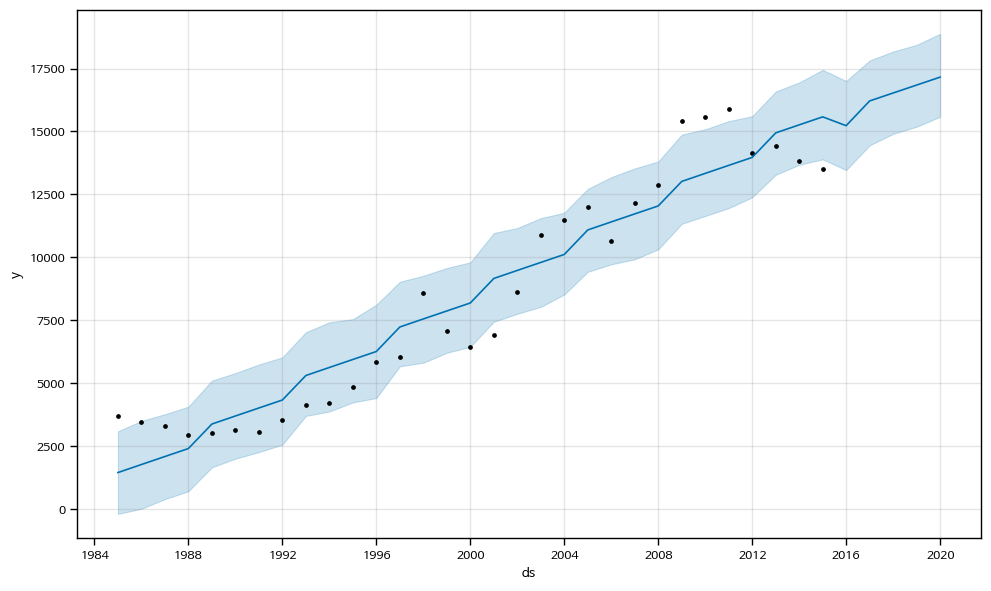

In [123]:
m = Prophet()
m.fit(df_prophet)
future = m.make_future_dataframe(periods=5,freq='Y')
forecast = m.predict(future)
fig = m.plot(forecast)

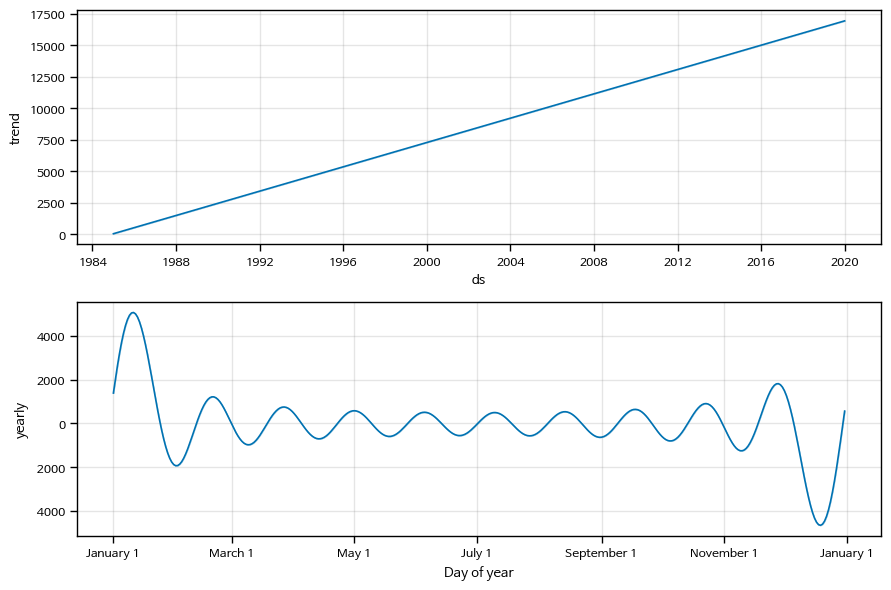

In [124]:
m.plot_components(forecast);

In [125]:
# from prophet import Prophet
# import warnings

# 세계 미래예측 (1979~2015 데이터)

# dateparse = lambda dates: pd.datetime.strptime(dates, '%Y')
# data=pd.read_csv('https://raw.githubusercontent.com/the9world/My_Study/main/data/Z_running_file/who_suicide_statistics.csv', parse_dates=['year'], index_col='year',date_parser=dateparse)
# data.dropna(inplace=True)

# data=data.loc[(data.index < '2016-01-01')]
# data=data.reset_index()
# data=pd.DataFrame(data.groupby(['year'])['suicides_no'].sum()).reset_index()
# data=data.sort_values(by=['suicides_no'],ascending=False)
# data= data.set_index('year')
# data.head()

In [126]:
# df_prophet = data.copy()
# df_prophet.reset_index(drop=False,inplace=True)
# df_prophet.columns = ['ds','y']
# df_prophet=df_prophet[:]

# m = Prophet()
# m.fit(df_prophet)
# future = m.make_future_dataframe(periods=5,freq='Y')
# forecast = m.predict(future)
# fig = m.plot(forecast)

In [127]:
# m.plot_components(forecast);

In [128]:
# # 남녀 자살 비교 전체
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, constrained_layout=True, sharey=True)
# fig.set_size_inches(8, 8)
# ax1.set_title('World')
# ax2.set_title('Korea')
# ax3.set_title('Japan')
# fig.suptitle('Comparison graph', fontsize=16)
# sns.barplot(data=df[df['year'] > 1990], x='sex', y='suicides_no', ax=ax1)
# sns.barplot(data=df_kor[df_kor['year'] > 1990], x='sex', y='suicides_no', ax=ax2)
# sns.barplot(data=df[(df['country'] == 'Japan') & (df['year'] > 1990)], x='sex', y='suicides_no', ax=ax3)

In [129]:
# 피봇 예시

# pivot_table_1 = df.pivot_table(index='country', columns='year', values='suicides_no', aggfunc='sum')
# pivot_table_2 = df.pivot_table(index='year', columns='country', values='suicides_no', aggfunc='sum')

# # pivot_table.loc['Republic of Korea',]

# world_pivot_1= pivot_table_1.sum().to_frame('suicides_no') ; world_pivot_1
# jp_pivot_1= pivot_table_1['Japan'].to_frame('sucides_no')
# kor_pivot_1= pivot_table_1['Republic of Korea'].to_frame('suicides_no')

# world_1_pivot= pivot_table_1.reset_index()
# world_2_pivot= pivot_table_2.reset_index()
# kor_1_pivot= kor_pivot_1.reset_index()
# jp_1_pivot= jp_pivot_1.reset_index()

In [130]:
# world_iloc = world_1_pivot.iloc[:,1:]
# world_iloc = world_iloc.sum().to_frame('suicides_no'); world_iloc
# world_iloc.reset_index(inplace=True)

In [131]:
# 1. 나라별 연도별 자살건수,
# 2. 연도별 남녀 자살건수, 나라별 남녀 자살건수,
	#  나라별 연도별 남녀 자살건수
# 3. 연도별 나이별 자살건수, 나라별 나이별 자살건수,
	#  나라별 연도별 나이별 자살건수

In [132]:
# # 나라별 ry 위경도  샘플을 받기 위해 geo 판다스 설치
# from shapely.geometry import Polygon, MultiPolygon, Point
# ! pip install geopandas 
# import geopandas as gpd

In [133]:
# # geo pandas에서 지원하는 도시별, 나라별 ry 위경도 샘플 
# cities = gpd.read_file(gpd.datasets.get_path("naturalearth_cities"))
# display(cities.shape, cities.head()) # 도시 위경도

# countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
# display(countries.shape, countries.head()) # 대륙, 국가, iso코드

In [134]:
# # 나라별, 지역별 위경도와 iso 코드
# gpd.datasets.get_path('naturalearth_lowres')
# import geopandas as gpd
# from geopandas import GeoDataFrame as gdf
# path = gpd.datasets.get_path('naturalearth_lowres')
# world = gpd.read_file(path) # shape file 읽기
# world.head(50)

In [135]:
## 세계지도 나타내기만함
# world.plot(figsize=(10,10))

In [136]:
# # 위의 세계지도에 색칠 
# world2 = world.loc[(world.pop_est>0) & (world.name != "Antarctica")]
# world2['gdp_per_cap'] = world2.gdp_md_est / world2.pop_est
# world2.plot(column='gdp_per_cap', figsize=(10, 10));

In [137]:
# # 위의 색칠한 세계지도의 범례추가, x,y축 제거 등
# import matplotlib.pyplot as plt
# fig = world2.plot(column='gdp_per_cap', 
#                   figsize=(15, 5),
#                   legend=True, # 범례추가
#                   cmap='magma') 
# plt.title('die')
# fig.set_axis_off(); # XY축 표시 제거
# plt.show()

In [138]:
## 지도데이터 생성, 세계지도 나타내기만 함.
# import folium

# m = folium.Map(location = [36.5194, 127.9806], zoom_start = 2, # location : 위도, 경도 / zoom_start: 초기 확대/축소 레벨을 설정합니다. 값이 클수록 더 확대
#                max_bounds = True,  # 지도의 경계를 설정
#                min_zoom = 2, min_lat = -84, # min_zoom, min_lat, max_lat, min_lon, max_lon: 지도의 최소 확대/축소 레벨, 최소/최대 위도, 최소/최대 경도 값을 설정
#                max_lat = 84, min_lon = -175, max_lon = 187) ; m

In [139]:
# # 위에 그린 세계지도에 나라별 경계선을 그린다
# import json

# map = folium.Map(location=[35.762887375145795, 84.08313219586536], zoom_start=3,
#                max_bounds=True, 
#                min_zoom=2, min_lat=-84, 
#                max_lat=84, min_lon=-175, max_lon=187)

# geo_data = 'World_Countries__Generalized_.geojson'
# with open('/content/drive/MyDrive/My_Study/running/World_Countries__Generalized_.geojson', 'r', encoding='utf-8') as f:
#     jsonData = json.load(f)
# folium.GeoJson(jsonData, name='json_data').add_to(map)
# map

In [140]:
## 아래의 링크의 지도 상세 분석 맵을 보기 위한 것들.
# !pip install plotly 
# from IPython.display import IFrame
# IFrame('https://public.tableau.com/views/WHOSuicide_16123322713250/Dashboard13?:language=en&:display_count=y&publish=yes&:origin=viz_share_link:showVizHome=no&:embed=true', width=600, height=1600)

In [141]:
# 결측치를 mean으로 채우고 나라 연도 자살건수로 데이터가공

# df.fillna(df.mean(),inplace=True)
# df_sui=pd.DataFrame(df.groupby(['country','year'])['suicides_no'].sum().reset_index())
# df_sui.head()

In [142]:
# pivot_table() 함수를 사용하여 피벗 테이블을 생성할 때 aggfunc='sum'을 지정하여 'suicides_no' 값을 합산하도록 설정

# pivot_table = df.pivot_table(index='age', columns='country', values='suicides_no', aggfunc='sum') # ; pivot_table
# pivot_table = df.pivot_table(index='country', columns='age', values='suicides_no', aggfunc='sum')

# # pivot_table.loc['Republic of Korea',]

# world_pivot= pivot_table.sum().to_frame('suicides_no')
# jp_pivot= pivot_table.loc['Japan'].to_frame('suicides_no')
# kor_pivot= pivot_table.loc['Republic of Korea'].to_frame('suicides_no')

# world_pivot1= world_pivot.reset_index()
# kor_pivot1= kor_pivot.reset_index()
# jp_pivot1= jp_pivot.reset_index()

# print(kor_pivot1)
# print('-'*30)
# print(jp_pivot1)
# print('-'*30)
# print(world_pivot1)

In [143]:
# pivot_table

In [144]:
# !pip install pycountry

# import pycountry

# def get_alpha3_code(country_name):
#     try:
#         country = pycountry.countries.get(name=country_name)
#         if country is not None:
#             return country.alpha_3
#         else:
#             return None
#     except LookupError:
#         return None

# # 국가명을 ISO Alpha-3 코드로 변환
# df['alpha3_code'] = df['country'].apply(get_alpha3_code)

In [145]:
count_max_sui=pd.DataFrame(df.groupby(['year','country'])['suicides_no'].sum().reset_index())

import plotly.express as px
fig4 = px.choropleth(count_max_sui.sort_values("year"), 
                        locations = 'country',
                        color = "suicides_no",
                        color_continuous_scale = 'bluyl',
                        locationmode='country names',
                        animation_frame= 'year')
fig4.update_layout(title='World Suicides')
fig4.show()


# fig4 = px.choropleth(df.sort_values("year"), 
#                         locations = "country", 
#                         color = "suicides_no",
#                         color_continuous_scale = 'bluyl',
#                         locationmode= "country names",
#                         animation_frame= 'year')
# fig4.update_layout(title='World Suicides')
# fig4.show()

In [146]:
# https://www.kaggle.com/code/duttadebadri/why-suicides-are-a-major-concern
# https://www.kaggle.com/code/nozomuk/world-health-organisation